In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['timesData.csv', 'cwurData.csv', 'shanghaiData.csv', 'school_and_country_table.csv', 'educational_attainment_supplementary_data.csv', 'education_expenditure_supplementary_data.csv']


In [2]:
# Load data that we will use.
timesData = pd.read_csv("../input/timesData.csv")

In [3]:
# information about timesData
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null object
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2603 non-null object
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2603 non-null object
total_score               2603 non-null object
num_students              2544 non-null object
student_staff_ratio       2544 non-null float64
international_students    2536 non-null object
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(4), int64(1), object(9)
memory usage: 284.8+ KB


In [4]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [5]:
#Prepare DataFrame
df= timesData.iloc[:100,:]

In [6]:
#import library as "go"
import plotly.graph_objs as go

In [7]:
#creating line1

line1= go.Scatter(
    x = df.world_rank, # x axis
    y = df.citations, # y axis
    mode = "lines", #type of plot
    name = "citations", # name of the plots
    marker = dict(color = 'rgba(167,150,55,0.8)'), #color + opacity
    text = df.university_name # hover text
)

#cretaing line2
line2= go.Scatter(
    x = df.world_rank,
    y = df.teaching,
    mode = 'lines+markers',
    name = "teaching",
    marker = dict(color = 'rgba(95,26,80,0.8)'),
    text = df.university_name
) 

data = [line1,line2]

layout= dict(title= 'Citation and Teaching vs World Rank of Top 100 Universities',              
             xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
)
fig = dict(data = data, layout = layout)
iplot(fig)

In [8]:
#preparing dataframe

df2014= timesData[timesData.year==2014].iloc[:100,:]
df2015= timesData[timesData.year==2015].iloc[:100,:]
df2016= timesData[timesData.year==2016].iloc[:100,:]

In [9]:
#import library as "go"
import plotly.graph_objs as go

In [10]:
#creating trace1
trace1=go.Scatter(
    x=df2014.world_rank,
    y=df2014.citations,
    mode = 'markers',
    name= '2014',
    marker= dict(color= 'rgba(255,128,255,0.8)'),
    text=df2014.university_name
)
#creating trace2
trace2=go.Scatter(
    x=df2015.world_rank,
    y=df2015.citations,
    mode = 'markers',
    name= '2015',
    marker= dict(color= 'rgba(255,128,2,0.8)'),
    text=df2015.university_name
)
#creating trace3
trace3=go.Scatter(
    x=df2016.world_rank,
    y=df2016.citations,
    mode = 'markers',
    name= '2016',
    marker= dict(color= 'rgba(0,255,200,0.8)'),
    text=df2016.university_name
)

In [11]:
data=[trace1,trace2,trace3]

In [12]:
layout = dict(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )

In [13]:
layout = dict(title='Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False))

In [14]:
fig = dict(data = data, layout = layout)
iplot(fig)

In [15]:
#preparing dataframe

df2014= timesData[timesData.year==2014].iloc[:100,:]
df2015= timesData[timesData.year==2015].iloc[:100,:]
df2016= timesData[timesData.year==2016].iloc[:100,:]
#creating trace1
trace1=go.Scatter(
    x=df2014.world_rank,
    y=df2014.total_score,
    mode = 'lines+markers',
    name= '2014',
    marker= dict(color= 'rgba(112,155,110,0.8)'),
    text=df2014.university_name
)
#creating trace2
trace2=go.Scatter(
    x=df2015.world_rank,
    y=df2015.total_score,
    mode = 'lines+markers',
    name= '2015',
    marker= dict(color= 'rgba(12,15,22,0.8)'),
    text=df2015.university_name
)
#creating trace3
trace3=go.Scatter(
    x=df2016.world_rank,
    y=df2016.total_score,
    mode = 'lines+markers',
    name= '2016',
    marker= dict(color= 'rgba(50,112,1,0.8)'),
    text=df2016.university_name
)

In [16]:
data=[trace1,trace2,trace3]

In [17]:
layout = dict(title='Total Score vs world rank of top 100 universities with 2014, 2015 and 2016 years',
             xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Total Score',ticklen= 5,zeroline= False)
             )

In [18]:
fig = dict(data = data, layout = layout)
iplot(fig)

In [19]:
#preparing dataframes
df2014=timesData[timesData.year==2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [20]:
#import library as "go"
import plotly.graph_objs as go

In [21]:
#create traces

trace1 = go.Bar(
    x = df2014.university_name,
    y=df2014.citations,
    name='citations',
    marker =dict(color='rgba(213,62,7,0.5)',
               line =dict(color='rgb(0,0,0)',width=1.5)),
                text=df2014.country
)


trace2 = go.Bar(
    x = df2014.university_name,
    y=df2014.teaching,
    name='teaching',
    marker=dict(color='rgba(255,253,208,0.5)',
               line =dict(color='rgb(0,0,0)',width=1.5)),
                text=df2014.country
)

In [22]:
data = [trace1, trace2]


In [23]:
layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'Universities',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [24]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

In [25]:
x=df2014.university_name

trace1={
    'x':x,
    'y':df2014.citations,
    'name':'citations',
    'type':'bar'
}
trace2={
    'x':x,
    'y':df2014.teaching,
    'name':'teaching',
    'type':'bar'
}

In [26]:
data = [trace1, trace2]
layout={
    'xaxis':{'title':'Top 3 Universities'},
    'barmode':'relative',
    'title':'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [27]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.international]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(0, 130, 230, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='internatinal students',
)
layout = dict(
                title='Citations and International Students',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [28]:
# prepare data frames
df2016=timesData[timesData.year==2016].iloc[:7,:]

In [29]:
studentnumberfloat= df2016.num_students
studentnumberfloat_list = [float(each.replace(',','.'))for each in df2016.num_students]
labels=df2016.university_name

In [30]:
#figure

fig = {
    "data": [
        {
            "values":studentnumberfloat_list,
            "labels":labels,
            "domain":{"x":[0,.5]},
            "name":"Number of Students Rates",
            "hoverinfo":"label+percent+name",
            "hole":.3,
            "type":"pie"
            
        },],
    "layout":{
        "title":"Universities Number of Student Rates",
        "annotations":[
            {
                "font":{"size":20},
                "showarrow": True,
                "text":"Number of Students",
                "x":0.20,
                "y":1
            }
        ]
    }
}
iplot(fig)

In [31]:
#data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]

In [32]:
#visualization

data = [
    {
        'y':df2016.teaching,
        'x':df2016.world_rank,
        'mode':'markers',
        'marker':{
            'color':international_color,
            'size':num_students_size,
            'showscale':True
        },
        'text':df2016.university_name
    }
]
iplot(data)

In [33]:
 #preparedata

a2011=timesData.student_staff_ratio[timesData.year==2011]
a2012=timesData.student_staff_ratio[timesData.year==2012]

#visualization

trace1= go.Histogram(
    x=a2011,
    opacity=0.75,
    name="2011",
    marker=dict(color='rgba(64,130,109,0.6)'))

trace2=go.Histogram(
    x=a2012,
    opacity=0.75,
    name="2012",
    marker=dict(color='rgba(175,218,252,0.6)'))

data=[trace1,trace2]

layout = go.Layout(
    barmode='overlay',
    title='students-staff ratio in 2011 and 2012',
    xaxis=dict(title='students-staff ratio'),
    yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

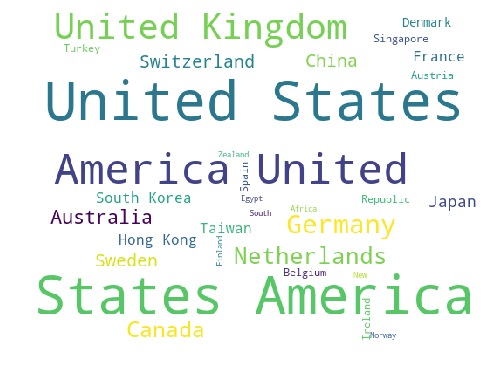

In [34]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [35]:
#datapreparation

s2015 = timesData[timesData.year == 2015]

#crete figure

trace0 = go.Box(
    y=s2015.total_score,
    name ='total score of universities in 2015',
    marker = dict(color='rgb(12,12,140)')
    
)

trace1 = go.Box(
    y=s2015.research,
    name ='research of universities in 2015',
    marker = dict(color='rgb(12,128,128)')
    
)

data = [trace0,trace1]

iplot(data)

In [36]:
#import Fig. Factory

import plotly.figure_factory as ff

#preparedata
dataframe = timesData[timesData.year == 2015]
#we crete dataframe that include certain features
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)

#scatter
fig =ff.create_scatterplotmatrix(data2015, diag='box',index='index',colormap='Portland',colormap_type='cat',height=700, width=700)
iplot(fig)

In [37]:
#firstlineplot

trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name="teaching",
    marker=dict(color='rgba(16,112,2,0.8)'),
)

#secondlineplot

trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name="inncome",
    marker=dict(color='rgba(160,112,20,0.8)'),
)

data=[trace1,trace2]
layout=go.Layout(
    xaxis2=dict(domain=[0.6,0.95],anchor='y2',),
    yaxis2=dict(domain=[0.6,0.95],anchor='x2',),
    title='Income and Teaching vs World Rank of Universities'

)

fig=go.Figure(data=data,layout=layout)
iplot(fig)

In [38]:
#create trace1 for 3d plot

trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [41]:

#creating traces

trace1= go.Scatter(
    x= dataframe.world_rank,
    y= dataframe.research,
    name="research"
)

trace2=go.Scatter(
    x= dataframe.world_rank,
    y= dataframe.citations,
    xaxis='x2',
    yaxis='y2',
    name="citations"
)

trace3=go.Scatter(
x= dataframe.world_rank,
    y=dataframe.income,
    xaxis='x3',
    yaxis='y3',
    name="income"
)


trace4=go.Scatter(
x= dataframe.world_rank,
    y=dataframe.total_score,
    xaxis='x4',
    yaxis='y4',
    name="total_score"
)

data=[trace1,trace2,trace3,trace4]
layout =go.Layout(
    xaxis=dict(
        domain=[0,0.45]
    ),
    yaxis=dict(
        domain=[0,0.45]
    ),
    xaxis2=dict(
        domain=[0.55,1]
    ),
    xaxis3=dict(
        domain=[0,0.45],
        anchor='y3'
    ),
    xaxis4=dict(
        domain=[0.55,1],
        anchor='y4'
    ),
    yaxis2=dict(
        domain=[0,0.45],
        anchor='x2'
    ),
    yaxis3=dict(
        domain=[0.55,1]

    ),
    yaxis4=dict(
        domain=[0.55,1],
        anchor='x4'
    ),
    title = 'Research, citation, income and total score VS World Rank of Universities'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)